In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat

tiny_data = read_csv("1.csv", usecols=[3, 4, 5, 6, 7])
tiny_data = DataFrame(tiny_data.as_matrix(), columns=['high', 'low', 'average', 'humidity', 'target'])

## 1. Convert target value to a ratio: power_today / power_yesterday to remove the time dependency between today's power consumption and yesterday's consumption

In [3]:
tiny_data.head()

,high,low,average,humidity,target
0,1.9,-0.4,0.7875,75.000,901.094080
1,6.2,-3.9,1.7625,77.250,744.658412
2,7.8,2.0,4.2375,72.750,743.560438
3,8.5,-1.2,3.0375,65.875,784.915894
4,7.9,-3.6,1.8625,55.375,685.154914


In [4]:
# Set the first target ratio to be 1, the scond value is day2 / day 1, util the last value
def ratio(dataset):
    target = dataset[['target']].as_matrix()
    ratio = list()
    ratio.append(1)
    for i in range(1, len(target)):
        value = target[i] / target[i - 1]
        ratio.append(value[0])
    return ratio

In [5]:
target = DataFrame(ratio(tiny_data))
target_np = ratio(tiny_data)
target.head()

,0
0,1.000000
1,0.826394
2,0.998526
3,1.055618
4,0.872902


In [6]:
import pandas as pd

ratio_d = tiny_data[['high', 'low', 'average', 'humidity']] 
ratio_df = pd.concat([ratio_d, target], axis=1)
ratio_df.columns = ['high', 'low', 'average', 'humidity', 'target']
ratio_df.head()

,high,low,average,humidity,target
0,1.9,-0.4,0.7875,75.000,1.000000
1,6.2,-3.9,1.7625,77.250,0.826394
2,7.8,2.0,4.2375,72.750,0.998526
3,8.5,-1.2,3.0375,65.875,1.055618
4,7.9,-3.6,1.8625,55.375,0.872902


In [7]:
# See the statistics information
ratio_df.describe()

,high,low,average,humidity,target
count,578.000000,578.000000,578.000000,578.000000,578.000000
mean,20.974740,12.712976,16.707818,76.481134,1.004465
std,9.218013,9.316424,9.087372,12.002461,0.106000
min,0.000000,-10.900000,-7.800000,39.125000,0.536749
25%,13.025000,4.925000,9.059375,69.156250,0.953329
50%,22.950000,13.950000,18.668750,78.250000,1.000166
75%,28.200000,20.575000,23.956250,85.000000,1.057694
max,38.100000,28.600000,32.575000,99.000000,1.454849


## 2. Next step is to handle temperature and humidity features

具体来说，对每个feature做成一度的categoritcal，然后one－hot encoding

In [8]:
new_ratio = ratio_df
np_array = new_ratio[['high', 'low', 'average']].as_matrix()
np_array

array([[  1.9   ,  -0.4   ,   0.7875],
       [  6.2   ,  -3.9   ,   1.7625],
       [  7.8   ,   2.    ,   4.2375],
       ..., 
       [ 29.9   ,  18.1   ,  23.7125],
       [ 29.3   ,  16.9   ,  23.325 ],
       [ 30.4   ,  18.6   ,  24.525 ]])

In [9]:
np_num1 = []
np_num2 = []
np_num3 = []

for num in np_array:
    np_num1.append(num[0])
    np_num2.append(num[1])
    np_num3.append(num[2])

In [12]:
# Convert high into categorical data

# Temp:
"""
-11 ~ -10: 'h0'
-10 ~ -9: 'h1'
-9 ~ -8: 'h2'
-8 ~ -7: 'h3'
-7 ~ -6: 'h4'
-6 ~ -5: 'h5'
-5 ~ -4: 'h6'
-4 ~ -3: 'h7'
-3 ~ -2: 'h8'
-2 ~ -1: 'h9'
-1 ~ 0: 'h10'
    
0 - 1: 'h11'
1 - 2: 'h12'
2 - 3: 'h13'
3 - 4: 'h14'
5 - 6: 'h15'
6 - 7: 'h16'
7 - 8: 'h17'
8 - 9: 'h18'
9 - 10: 'h19'
    
10 - 11: 'h20'
11 - 12: 'h21'
12 - 13: 'h22'
13 - 14: 'h23'
15 - 16: 'h24'
16 - 17: 'h25'
17 - 18: 'h26'
18 - 19: 'h27'
19 - 20: 'h28'
    
20 - 21: 'h29'
21 - 22: 'h30'
22 - 23: 'h31'
23 - 24: 'h32'
25 - 26: 'h33'
26 - 27: 'h34'
27 - 28: 'h35'
28 - 29: 'h36'
29 - 30: 'h37'
    
30 - 31: 'h38'
31 - 32: 'h39'
32 - 33: 'h40'
33 - 34: 'h41'
35 - 36: 'h42'
36 - 37: 'h43'
37 - 38: 'h44'
38 - 39: 'h45'
"""
 
nums = np_num3

for i in range(len(nums)):
    if nums[i] >= -11 and nums[i] < -10:
        nums[i] = 'h0'
    elif nums[i] >= -10 and nums[i] < -9:
        nums[i] = 'h1'
    elif nums[i] >= -9 and nums[i] < -8:
        nums[i] = 'h2'
    elif nums[i] >= -8 and nums[i] < -7:
        nums[i] = 'h3'
    elif nums[i] >= -7 and nums[i] < -6:
        nums[i] = 'h4'
    elif nums[i] >= -6 and nums[i] < -5:
        nums[i] = 'h5'
    elif nums[i] >= -5 and nums[i] < -4:
        nums[i] = 'h6'
    elif nums[i] >= -4 and nums[i] < -3:
        nums[i] = 'h7'
    elif nums[i] >= -3 and nums[i] < -2:
        nums[i] = 'h8'
    elif nums[i] >= -2 and nums[i] < -1:
        nums[i] = 'h9'
    elif nums[i] >= -1 and nums[i] < 0:
        nums[i] = 'h10'
    elif nums[i] >= 0 and nums[i] < 1:
        nums[i] = 'h11'
    elif nums[i] >= 1 and nums[i] < 2:
        nums[i] = 'h12'
    elif nums[i] >= 2 and nums[i] < 3:
        nums[i] = 'h13'
    elif nums[i] >= 3 and nums[i] < 4:
        nums[i] = 'h14'
    elif nums[i] >= 4 and nums[i] < 5:
        nums[i] = 'h15'
    elif nums[i] >= 5 and nums[i] < 6:
        nums[i] = 'h16'
    elif nums[i] >= 6 and nums[i] < 7:
        nums[i] = 'h17'
    elif nums[i] >= 7 and nums[i] < 8:
        nums[i] = 'h18'
    elif nums[i] >= 8 and nums[i] < 9:
        nums[i] = 'h19'
    elif nums[i] >= 9 and nums[i] < 10:
        nums[i] = 'h20'
    elif nums[i] >= 10 and nums[i] < 11:
        nums[i] = 'h21'
    elif nums[i] >= 11 and nums[i] < 12:
        nums[i] = 'h22'
    elif nums[i] >= 12 and nums[i] < 13:
        nums[i] = 'h23'
    elif nums[i] >= 13 and nums[i] < 14:
        nums[i] = 'h24'
    elif nums[i] >= 14 and nums[i] < 15:
        nums[i] = 'h25'
    elif nums[i] >= 15 and nums[i] < 16:
        nums[i] = 'h26'
    elif nums[i] >= 16 and nums[i] < 17:
        nums[i] = 'h27'
    elif nums[i] >= 17 and nums[i] < 18:
        nums[i] = 'h28'
    elif nums[i] >= 18 and nums[i] < 19:
        nums[i] = 'h29'
    elif nums[i] >= 19 and nums[i] < 20:
        nums[i] = 'h30'
    elif nums[i] >= 20 and nums[i] < 21:
        nums[i] = 'h31'
    elif nums[i] >= 21 and nums[i] < 22:
        nums[i] = 'h32'
    elif nums[i] >= 22 and nums[i] < 23:
        nums[i] = 'h33'
    elif nums[i] >= 23 and nums[i] < 24:
        nums[i] = 'h34'
    elif nums[i] >= 24 and nums[i] < 25:
        nums[i] = 'h35'
    elif nums[i] >= 25 and nums[i] < 26:
        nums[i] = 'h36'
    elif nums[i] >= 26 and nums[i] < 27:
        nums[i] = 'h37'
    elif nums[i] >= 27 and nums[i] < 28:
        nums[i] = 'h38'
    elif nums[i] >= 28 and nums[i] < 29:
        nums[i] = 'h39'
    elif nums[i] >= 29 and nums[i] < 30:
        nums[i] = 'h40'
    elif nums[i] >= 30 and nums[i] < 31:
        nums[i] = 'h41'
    elif nums[i] >= 31 and nums[i] < 32:
        nums[i] = 'h42'
    elif nums[i] >= 32 and nums[i] < 33:
        nums[i] = 'h43'
    elif nums[i] >= 33 and nums[i] < 34:
        nums[i] = 'h44'
    elif nums[i] >= 34 and nums[i] < 35:
        nums[i] = 'h45'
    elif nums[i] >= 35 and nums[i] < 36:
        nums[i] = 'h46'
    elif nums[i] >= 36 and nums[i] < 37:
        nums[i] = 'h47'
    elif nums[i] >= 37 and nums[i] < 38:
        nums[i] = 'h48'
    elif nums[i] >= 38 and nums[i] < 39:
        nums[i] = 'h49'


In [13]:
df_num1 = DataFrame(np_num1, columns=['high'])
df_num2 = DataFrame(np_num2, columns=['low'])
df_num3 = DataFrame(np_num3, columns=['average'])

df_num1.head()

,high
0,h12
1,h17
2,h18
3,h19
4,h18


In [14]:
pd_high = pd.get_dummies(df_num1, prefix=['high'])
pd_low = pd.get_dummies(df_num2, prefix=['low'])
pd_average = pd.get_dummies(df_num3, prefix=['aver'])

In [15]:
features = pd.concat([pd_high, pd_low, pd_average], axis=1)
features.head()

,high_h11,high_h12,high_h13,high_h14,high_h15,high_h16,high_h17,high_h18,high_h19,high_h20,...,aver_h37,aver_h38,aver_h39,aver_h40,aver_h41,aver_h42,aver_h43,aver_h6,aver_h8,aver_h9
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Normalized the humidity feature and concatenate the features together

In [16]:
# Normalize humidity
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
humidity_scaled = min_max_scaler.fit_transform(ratio_df[['humidity']])
humidity_scaled

array_hum = []
for num in humidity_scaled:
    array_hum.append(num[0])
    
pd_hum = DataFrame(array_hum, columns=[['humidity']])
pd_hum.head()

,humidity
0,0.599165
1,0.636743
2,0.561587
3,0.446764
4,0.271399


In [17]:
features_ = pd.concat([features, pd_hum], axis=1)
features_.head()

,high_h11,high_h12,high_h13,high_h14,high_h15,high_h16,high_h17,high_h18,high_h19,high_h20,...,aver_h38,aver_h39,aver_h40,aver_h41,aver_h42,aver_h43,aver_h6,aver_h8,aver_h9,humidity
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.599165
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.636743
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.561587
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.446764
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.271399


In [18]:
## 4. Add Holiday (weekday and weekend) as a feature - holiday
holiday = [0] * 578
holiday[0] = 1
end = 1
while end + 5 <= 577:
    end += 5
    holiday[end] = 1
    
    end += 1
    holiday[end] = 1
    
    end += 1

len(holiday)

578

In [19]:
final_features = pd.concat([features_, DataFrame(holiday, columns=['holiday'])], axis=1)
final_features.head()

,high_h11,high_h12,high_h13,high_h14,high_h15,high_h16,high_h17,high_h18,high_h19,high_h20,...,aver_h39,aver_h40,aver_h41,aver_h42,aver_h43,aver_h6,aver_h8,aver_h9,humidity,holiday
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.599165,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.636743,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.561587,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.446764,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.271399,0


In [20]:
final_features.shape

(578, 118)

## 4. Run SVM to get the baseline

In [52]:
# Test using SVM
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(final_features, target_np, test_size=0.25)

regressor = SVR(C=0.1, kernel='rbf', epsilon=0.01)
regressor.fit(X_train, y_train)

mean_absolute_error(y_test, regressor.predict(X_test)) 

0.071169898173852733

In [27]:
# Define loss function using error rate which is abs(predicted - target) / target
def loss(y_test, y_pred):
    error = 0
    for y in zip(y_test, y_pred):
        error += abs(y[0] - y[1]) / y[0]
        
    return error / len(y_test)

In [66]:
loss(y_test, regressor.predict(X_test))

0.076691906830279433

In [34]:
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

In [54]:
Y_pred = regressor.predict(final_features)
loss(target_np, Y_pred)

0.073637976891526957

In [70]:
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(regressor, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: 0.03142 (0.03864) Error Rate


### Two Baselines: 

1. Linear Regressor
2. Decision Tree Regressor

In [29]:
# Baseline 1: Linear Regressor

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

loss(y_test, reg.predict(X_test))

228085259039.39948

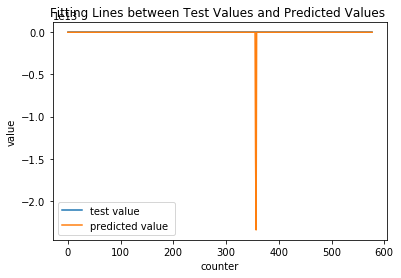

In [35]:
PlotHistory(target_np, reg.predict(np_features))

In [76]:
# Baseline 2: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)

loss(y_test, reg.predict(X_test)) 

0.078467827829819758

In [77]:
# Predict Error for All Data using Decision Tree Regressor
Y_pred = reg.predict(final_features)
loss(target_np, Y_pred)

0.0746146558458161

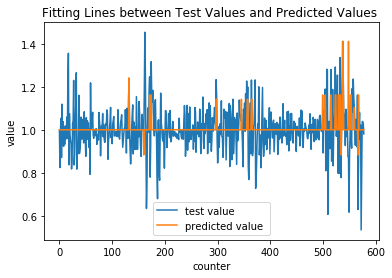

In [78]:
PlotHistory(target_np, Y_pred)

In [ ]:
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=5, verbose=0)

In [86]:
regr = DecisionTreeRegressor(max_depth=3)

In [87]:
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(regr, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: -0.07310 (0.16822) Error Rate


In [85]:
results

array([ -6.75561170e-02,  -2.01220674e-02,  -2.17364860e-02,
         2.61696228e-02,  -5.29939395e-03,  -6.03333903e-02,
        -3.40099214e-04,  -3.17403630e-04,  -1.00354982e-02,
        -5.71422350e-01])

## 5. Show the Graph

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/mguo/Downloads/ENTER/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [48]:
def PlotHistory(y_test, y_pred):
    f, ax = plt.subplots()
    ax.plot(y_test)
    ax.plot(y_pred)
    ## Plot legend and use the best location automatically: loc = 0.
    ax.legend(['test value ', 'predicted value '], loc = 0) 
    ax.set_title('Fitting Lines between Test Values and Predicted Values ')
    ax.set_xlabel('counter')
    ax.set_ylabel('value') 

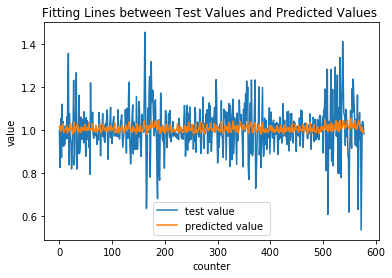

In [55]:
PlotHistory(target_np, Y_pred)

In [42]:
PlotHistory(target_np, Y_pred)

## 6. Deep Learning - Using Keras for building the network

In [100]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [111]:
# 1. Define Neural model
def baseline_model():
    model = Sequential()
    model.add(Dense(64, input_dim=118, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [112]:
# 2. Build the model
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=5, verbose=0)

In [113]:
# 3.1. Feed the data and get the evaluation results (3 layers)
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: 0.07991 (0.02635) Error Rate


## 7. Deeper Model

### 7.1  8-layers model

In [114]:
from keras.layers.normalization import BatchNormalization

In [125]:
# 1. Define Neural model
def deep_model():
    model = Sequential()
    
    model.add(Dense(64, input_dim=118, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [126]:
# 2. Build the model
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=deep_model, nb_epoch=50, batch_size=5, verbose=0)

In [127]:
# 3. Feed the data and get the evaluation results (8 layers)
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: 0.07758 (0.02367) Error Rate


### 7.2: 9-layers model

In [132]:
# 1. Define Neural model
def deep_model():
    model = Sequential()
    
    model.add(Dense(100, input_dim=118, activation='relu'))
    model.add(Dropout(0.6))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(5, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [133]:
# 2. Build the model
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=deep_model, nb_epoch=50, batch_size=5, verbose=0)

In [134]:
# 3. Feed the data and get the evaluation results (8 layers)
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: 0.07819 (0.02566) Error Rate


### 7.3: 10-layers model

In [136]:
# 1. Define Neural model
def deep_model():
    model = Sequential()
    
    model.add(Dense(64, input_dim=118, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(7, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [137]:
# 2. Build the model
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=deep_model, nb_epoch=50, batch_size=5, verbose=0)

In [138]:
# 3. Feed the data and get the evaluation results (8 layers)
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: 0.07829 (0.02331) Error Rate


In [142]:
### 7.4: 8-layers model with 100 training iteration

In [152]:
# 1. Define Neural model
def deep_model():
    model = Sequential()
    
    model.add(Dense(64, input_dim=118, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [155]:
# 2. Build the model
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=deep_model, nb_epoch=110, batch_size=5, verbose=0)

In [156]:
# 3. Feed the data and get the evaluation results (8 layers)
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: 0.07758 (0.02367) Error Rate


In [ ]:
## Summary: the best error rate is 7.758%.

# 8. Gating and LSTM

In [ ]:
from keras.layers import LSTM

# 1. Define LSTM model
def LSTM_model():
    model = Sequential()
    model.add(LSTM(10, input_shape=(118)))
    model.add(LSTM(4, input_shape=(10)))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

# 9. Multitask Learning

In [164]:
all_data = read_csv("data.csv")
all_data.head()

,year,month,day,high,low,average,humidity,target_1,target_2,target_3,...,target_37,target_38,target_39,target_40,target_41,target_42,target_43,target_44,target_45,target_46
0,2015,2,1,1.9,-0.4,0.7875,75.000,901.094080,162.949446,727.585676,...,478.261740,612.896364,747.532996,965.241734,841.822074,428.932244,315.977223,610.669157,715.010485,464.724511
1,2015,2,2,6.2,-3.9,1.7625,77.250,744.658412,144.802486,629.108444,...,397.217620,471.977703,613.450655,967.654491,678.675733,377.299306,304.421079,475.282134,654.681175,436.077693
2,2015,2,3,7.8,2.0,4.2375,72.750,743.560438,107.367718,633.000613,...,469.580215,468.818233,590.410559,918.974466,634.091766,423.005614,279.511575,475.837467,586.668844,450.792579
3,2015,2,4,8.5,-1.2,3.0375,65.875,784.915894,139.150299,631.792933,...,426.806403,406.796248,529.548238,799.568921,661.479923,368.000699,282.622732,465.404321,595.074607,420.071264
4,2015,2,5,7.9,-3.6,1.8625,55.375,685.154914,90.278503,575.140527,...,413.930428,428.102990,510.400056,705.148753,567.459090,373.563940,263.720232,432.416071,589.593886,401.559982


In [165]:
del all_data['year']
del all_data['month']
del all_data['day']
del all_data['high']
del all_data['low']
del all_data['average']
del all_data['humidity']

all_data.head()

,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,...,target_37,target_38,target_39,target_40,target_41,target_42,target_43,target_44,target_45,target_46
0,901.094080,162.949446,727.585676,-11.153406,123.609260,472.958564,834.962039,-4.321780,428.579080,219.059225,...,478.261740,612.896364,747.532996,965.241734,841.822074,428.932244,315.977223,610.669157,715.010485,464.724511
1,744.658412,144.802486,629.108444,3.139475,130.035425,446.337262,722.044629,13.753263,366.430302,262.458704,...,397.217620,471.977703,613.450655,967.654491,678.675733,377.299306,304.421079,475.282134,654.681175,436.077693
2,743.560438,107.367718,633.000613,-0.738059,95.405784,433.472087,749.277117,10.625347,329.560499,261.630709,...,469.580215,468.818233,590.410559,918.974466,634.091766,423.005614,279.511575,475.837467,586.668844,450.792579
3,784.915894,139.150299,631.792933,-10.069709,101.578663,399.229170,645.384388,18.048176,322.957442,229.032526,...,426.806403,406.796248,529.548238,799.568921,661.479923,368.000699,282.622732,465.404321,595.074607,420.071264
4,685.154914,90.278503,575.140527,-9.510255,108.534308,347.921127,621.195936,22.420897,327.327788,203.715167,...,413.930428,428.102990,510.400056,705.148753,567.459090,373.563940,263.720232,432.416071,589.593886,401.559982


In [169]:
all_data.describe()

,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,...,target_37,target_38,target_39,target_40,target_41,target_42,target_43,target_44,target_45,target_46
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,586.197709,285.046500,490.772663,156.048659,130.074646,312.434679,620.881838,114.019559,326.655980,215.219510,...,520.247194,418.178387,466.768330,552.271783,438.914756,287.312055,180.595186,410.572202,459.142460,371.664700
std,286.091280,199.862399,265.355729,174.256129,93.745707,196.657463,253.733802,99.625866,143.891431,137.811505,...,307.429948,242.690925,221.037984,263.522635,226.066905,149.633136,117.846971,192.013776,223.947843,212.250247
min,336.740122,21.150318,257.353534,-21.029919,35.995113,146.090480,393.617875,-14.804657,169.357817,104.390113,...,202.390508,230.925056,245.542608,291.913877,237.063207,158.577664,71.509404,237.953428,247.884440,210.482247
25%,410.332065,158.771288,332.233835,20.021201,79.094940,204.317552,469.745409,63.684747,236.494372,146.301021,...,352.041091,287.216682,339.478272,384.982720,305.145365,200.212154,109.130605,292.101183,314.714729,253.356933
50%,485.718435,241.455904,386.451650,122.507413,104.840755,240.559336,530.999904,92.559172,273.114090,163.698986,...,404.220756,329.574199,392.496892,459.141288,359.704440,235.196266,136.467067,339.309297,367.066054,296.224312
75%,645.223982,330.669537,524.913644,202.174512,149.374484,340.166474,654.929093,124.456267,351.386976,218.649802,...,564.388729,428.072956,501.345673,621.606897,464.333773,306.749532,209.058687,455.204775,513.154812,381.400179
max,1957.846210,1207.689996,1735.690175,983.147059,660.409882,1271.516219,1849.143185,601.685769,936.294368,931.763994,...,2035.097195,1586.692112,1573.637670,1723.167363,1537.294793,1041.672818,756.588113,1267.950940,1479.794424,1432.856096


In [172]:
# Handle Abnormal Data - Replace the value 0 and negative value to be 1 (for computing ratio)
def remove_abnormal(all_data):
    for index, row in all_data.iterrows():
        for i in range(len(row)):
            if row[i] <= 0:
                row[i] = 1
    
remove_abnormal(all_data)

In [173]:
all_data.describe()

,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,...,target_37,target_38,target_39,target_40,target_41,target_42,target_43,target_44,target_45,target_46
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,586.197709,285.046500,490.772663,156.752025,130.074646,312.434679,620.881838,114.081615,326.655980,215.219510,...,520.247194,418.178387,466.768330,552.271783,438.914756,287.312055,180.595186,410.572202,459.142460,371.664700
std,286.091280,199.862399,265.355729,173.604069,93.745707,196.657463,253.733802,99.551351,143.891431,137.811505,...,307.429948,242.690925,221.037984,263.522635,226.066905,149.633136,117.846971,192.013776,223.947843,212.250247
min,336.740122,21.150318,257.353534,0.152396,35.995113,146.090480,393.617875,0.497008,169.357817,104.390113,...,202.390508,230.925056,245.542608,291.913877,237.063207,158.577664,71.509404,237.953428,247.884440,210.482247
25%,410.332065,158.771288,332.233835,20.021201,79.094940,204.317552,469.745409,63.684747,236.494372,146.301021,...,352.041091,287.216682,339.478272,384.982720,305.145365,200.212154,109.130605,292.101183,314.714729,253.356933
50%,485.718435,241.455904,386.451650,122.507413,104.840755,240.559336,530.999904,92.559172,273.114090,163.698986,...,404.220756,329.574199,392.496892,459.141288,359.704440,235.196266,136.467067,339.309297,367.066054,296.224312
75%,645.223982,330.669537,524.913644,202.174512,149.374484,340.166474,654.929093,124.456267,351.386976,218.649802,...,564.388729,428.072956,501.345673,621.606897,464.333773,306.749532,209.058687,455.204775,513.154812,381.400179
max,1957.846210,1207.689996,1735.690175,983.147059,660.409882,1271.516219,1849.143185,601.685769,936.294368,931.763994,...,2035.097195,1586.692112,1573.637670,1723.167363,1537.294793,1041.672818,756.588113,1267.950940,1479.794424,1432.856096


In [177]:
all_data.shape

(578, 46)

In [190]:
# Set the first target ratio to be 1, the scond value is day2 / day 1, util the last value for each columns
def ratio(dataset):
    result = []
    for target in all_data.columns:
        target = dataset[[target]].as_matrix()
        ratio = []
        ratio.append(1.0)
        for i in range(1, len(target)):
            value = target[i] / target[i - 1]
            ratio.append(value[0])
        result.append(ratio)
    return result

In [191]:
all_ratio = ratio(all_data)

In [204]:
# Concatenate the ratio data from each column into DataFrame

def concatenate(all_ratio):
    temp_first = DataFrame(all_ratio[0], columns=['target1'])
    i = 1
    for ratio in all_ratio[1:]:
        i += 1
        temp_second = DataFrame(ratio, columns=['target' + str(i)])
        temp_first = pd.concat([temp_first, temp_second], axis=1)
    return temp_first

In [205]:
df_ratio = concatenate(all_ratio)
df_ratio.shape

(578, 46)

In [206]:
df_ratio.head()

,target1,target2,target3,target4,target5,target6,target7,target8,target9,target10,...,target37,target38,target39,target40,target41,target42,target43,target44,target45,target46
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.826394,0.888634,0.864652,3.139475,1.051988,0.943713,0.864763,13.753263,0.854989,1.198118,...,0.830544,0.770078,0.820634,1.002500,0.806199,0.879624,0.963427,0.778297,0.915625,0.938357
2,0.998526,0.741477,1.006187,0.318525,0.733691,0.971176,1.037716,0.772569,0.899381,0.996845,...,1.182174,0.993306,0.962442,0.949693,0.934307,1.121141,0.918174,1.001168,0.896114,1.033744
3,1.055618,1.296016,0.998092,1.000000,1.064701,0.921003,0.861343,1.698596,0.979964,0.875404,...,0.908911,0.867706,0.896915,0.870067,1.043193,0.869966,1.011131,0.978074,1.014328,0.931850
4,0.872902,0.648784,0.910331,1.000000,1.068475,0.871482,0.962521,1.242280,1.013532,0.889460,...,0.969832,1.052377,0.963841,0.881911,0.857863,1.015117,0.933118,0.929119,0.990790,0.955933


In [215]:
df_ratio['target1'].as_matrix()

array([ 1.        ,  0.82639363,  0.99852553,  1.05561815,  0.87290233,
        1.12077406,  0.92959534,  1.03949611,  0.92473908,  1.00670432,
        0.9341187 ,  1.0197213 ,  0.99730123,  0.95965728,  1.06109711,
        0.96177562,  1.23028238,  1.35706306,  0.83894779,  1.07692757,
        0.9812229 ,  0.95164109,  0.93856839,  0.81977909,  0.86915649,
        1.03214233,  1.04277134,  1.23111608,  0.83868482,  0.8911911 ,
        1.05525597,  1.12074712,  1.26675204,  0.81905597,  0.89630503,
        0.89022689,  0.98158738,  1.1622374 ,  0.89146431,  0.9138182 ,
        0.94590945,  1.06083219,  0.96952876,  0.95827977,  0.99451971,
        1.0516865 ,  0.9408342 ,  1.08554861,  1.01282279,  0.96543045,
        0.87856402,  1.05776786,  0.95615356,  1.04339546,  1.02121606,
        1.03227074,  0.92057609,  1.00374652,  0.79488547,  1.21973095,
        1.00548592,  1.01509938,  1.0438494 ,  1.08300278,  0.97935935,
        0.96234451,  1.00271897,  0.99973644,  0.97416693,  1.00

## Now Our Target Data for all the 46 Observation Sites  are ready!!

# Next We wil build multi-task network architecture!

In [ ]:
import keras.backend as K

In [208]:
# 1. Define Custom Loss Function
def custom_loss(true_pred_list):
    loss = 0
    for pair in true_pred_list:
        loss += K.abs(pair[0] - pair[1])
    loss = loss / len(true_pred_list)
    
    return loss

In [ ]:
# 2. Define multitask model
def multitask_model(input, output):
    Model = Sequential()
    
    l1 = Dense(64, input_dim=118, activation='relu')(input)
    l2 = Dropout(0.5)(l1)
    
    l3 = Dense(32, activation='relu')(l2)
    l4 = Dropout(0.3)(l3)
    
    l5 = Dense(15, activation='relu')(l4)
    l6 = Dropout(0.3)(l5)
    
    shared_layer = Dense(15, activation='relu')(l6)
    
    l8 = Dense(15, activation='relu')(shared_layer)
    l9 = Dense(1, name='first_site')(l8)
    
    l10 = Dense(15, activation='relu')(shared_layer)
    l11 = Dense(1, name='second_site')(l10)
    
    model = Model(input=[input], output=[l9, l11])
    
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    model.fit([headline_data, additional_data], [labels, labels], epochs=50, batch_size=32)
    
    return model

In [ ]:
model = multitask_model(np_features)

In [213]:
len(np_features[0])

118

In [ ]:
from keras.layers import Input
from keras.models import Model

main_input = Input(shape=(578, 118), dtype='int32', name='main_input')

l1 = Dense(64, input_dim=118, activation='relu')(main_input)
l2 = Dropout(0.5)(l1)
    
l3 = Dense(32, activation='relu')(l2)
l4 = Dropout(0.3)(l3)
    
l5 = Dense(15, activation='relu')(l4)
l6 = Dropout(0.3)(l5)
    
shared_layer = Dense(15, activation='relu')(l6)
    
l8 = Dense(15, activation='relu')(shared_layer)
l9 = Dense(1, name='first_site')(l8)
    
l10 = Dense(15, activation='relu')(shared_layer)
l11 = Dense(1, name='second_site')(l10)
    
model = Model(inputs=[main_input], output=[l9, l11])
    
model.compile(optimizer='adam', loss='mean_absolute_error')
    
model.fit({'main_input': np_features}, {'first_site': df_ratio['target1'].as_matrix(), 'second_site': df_ratio['target2'].as_matrix()}, epochs=5, batch_size=5)